In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from dotenv import load_dotenv, find_dotenv
import os
from datetime import date, timedelta
import plotly.express as px

pd.set_option("display.max_columns", None)


In [3]:
dotenv_path = find_dotenv()
load_dotenv(dotenv_path)
FACEIT_PLAYERID = os.environ.get("FACEIT_PLAYERID")


In [4]:
DF_all = pd.read_pickle("./AllDatabz2.pkl", compression="bz2")


In [5]:
DF_all.head()

,index,PlayerId,Kills,Assists,Deaths,Mvps,Headshots%,Score,Map,Result,CreatedAt,SteamData,Rounds,DateOrdinal,Year,Month,Day
0,87982,35dc17c8-6ca3-41c6-bc6c-e01a51f4c5d6,9,3,23,1,56,10:16,de_mirage,Lose,2016-05-24 11:43:02.394,False,26,736108,2016,5,24
1,87981,35dc17c8-6ca3-41c6-bc6c-e01a51f4c5d6,9,5,20,1,44,16:6,de_dust2,Lose,2016-05-24 12:18:48.669,False,22,736108,2016,5,24
2,37085,dd108e4c-590d-4ab5-b495-7edf146b7c0e,5,2,5,0,20,5:1,de_dust2,Lose,2016-05-24 13:09:32.673,False,6,736108,2016,5,24
3,87980,35dc17c8-6ca3-41c6-bc6c-e01a51f4c5d6,18,6,25,1,44,16:12,de_cache,Win,2016-05-24 13:19:42.652,False,28,736108,2016,5,24
4,87979,35dc17c8-6ca3-41c6-bc6c-e01a51f4c5d6,20,6,19,2,45,16:12,de_mirage,Lose,2016-05-24 14:07:22.922,False,28,736108,2016,5,24


In [6]:
DF_me = DF_all.query("PlayerId == @FACEIT_PLAYERID")
DF_others:pd.DataFrame = DF_all.query("PlayerId != @FACEIT_PLAYERID")

In [32]:
def count_wins(x):
    wins = pd.value_counts(x).get("Win")
    if wins:
        return wins
    else:
        return 0

In [33]:
Maps = (
    DF_others.groupby(by=["Map"])
    .aggregate(
        {
            "Kills": sum,
            "Deaths": sum,
            "Mvps": sum,
            "Map": "count",
            "Headshots%": "mean",
            "Result": lambda x: count_wins(x), 
        }
    )
    .rename({"Map": "TimesPlayed"}, axis=1)
)


C:\Users\dima1\AppData\Local\Temp\ipykernel_36208\1502203412.py:2: FutureWarning:

The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

C:\Users\dima1\AppData\Local\Temp\ipykernel_36208\1502203412.py:2: FutureWarning:

The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

C:\Users\dima1\AppData\Local\Temp\ipykernel_36208\1514900622.py:2: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.

C:\Users\dima1\AppData\Local\Temp\ipykernel_36208\1514900622.py:2: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instea

In [34]:
Map_names = ['de_cache', 'de_cbble', 'de_dust2', 'de_inferno', 'de_mirage','de_nuke', 'de_overpass', 'de_train']

In [35]:
Maps = Maps.loc[Map_names, :]

In [83]:
Maps

,Kills,Deaths,Mvps,TimesPlayed,Headshots%,Result,WinRate%,K/D
Map,,,,,,,,
de_mirage,2487272,2409016,353318,133169,41.705765,68787,51,1.03
de_inferno,1248223,1234139,178832,67677,41.385005,33978,50,1.01
de_dust2,903687,892624,127118,48738,42.284911,24401,50,1.01
de_cache,751567,760111,105645,43459,38.753745,21476,49,0.99
de_overpass,710209,700060,100361,38238,39.109080,19320,50,1.01
de_train,432832,428884,61415,23694,39.858192,12064,50,1.01
de_nuke,279872,278096,39778,14823,41.327329,7403,49,1.01
de_cbble,95493,102488,13454,6306,37.552965,2932,46,0.93


In [36]:
Maps = Maps.sort_values(by = "TimesPlayed")

In [58]:
fig = px.bar(Maps, y="TimesPlayed", x=Maps.index,
            text_auto = ".2s",

             
            title="Most played maps for other players from Faceit"
            )
fig.update_layout(xaxis_tickangle=-30)

fig.show()

In [61]:
Maps["WinRate%"] = (Maps["Result"] / Maps["TimesPlayed"] * 100).astype(int)
Maps.sort_values(by="TimesPlayed", inplace=True, ascending=False)
Maps["K/D"] = round(Maps["Kills"] / Maps["Deaths"], 2)


In [75]:
def human_format(num):
    num = float('{:.3g}'.format(num))
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '{}{}'.format('{:f}'.format(num).rstrip('0').rstrip('.'), ['', 'K', 'M', 'B', 'T'][magnitude])

In [82]:
data = Maps.sort_values(by = "WinRate%")

fig = px.bar(data, y="WinRate%", x=data.index,
            text=data["TimesPlayed"].apply(human_format),
            # text_auto = ".2f",
            title="Win rate - others"
            )
fig.update_layout(xaxis_tickangle=-30)

fig.show()

C:\Users\dima1\AppData\Local\Temp\ipykernel_36208\1585454290.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'From Faceit')

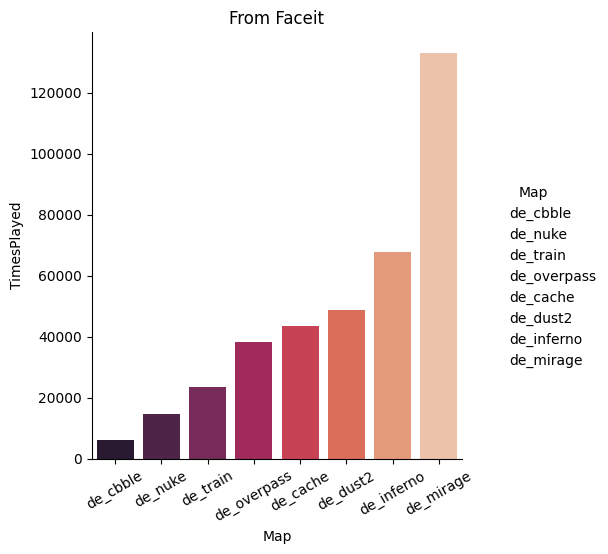

In [37]:
palette = sns.color_palette("rocket" , 8)
g = sns.catplot(
    data=Maps.sort_values(by = "TimesPlayed"),
    y="TimesPlayed",
    x="Map",
    kind = "bar",
    sharex=False,
    sharey=False,
    palette=palette
)
g.tick_params(axis = "x", rotation = 30)
g.axes.flat[0].set_title("From Faceit other players")
# g.axes.flat[1].set_title("From Steam")
# plt.xticks(rotation = 90)

# plt.plot()

In [11]:
Maps

,Kills,Deaths,Mvps,TimesPlayed,Headshots%,Result
Map,,,,,,
de_cbble,95493,102488,13454,6306,37.552965,3374
de_nuke,279872,278096,39778,14823,41.327329,7420
de_train,432832,428884,61415,23694,39.858192,12064
de_overpass,710209,700060,100361,38238,39.109080,19320
de_cache,751567,760111,105645,43459,38.753745,21983
de_dust2,903687,892624,127118,48738,42.284911,24401
de_inferno,1248223,1234139,178832,67677,41.385005,33978
de_mirage,2487272,2409016,353318,133169,41.705765,68787


In [12]:
def func(pct, allvalues):
    absolute = max(int(pct / 100 * np.sum(allvalues)), 1)
    return "{:.1f}%\n({:d} games)".format(pct, absolute)


In [19]:
fig = px.pie(values =Maps["TimesPlayed"],
             names = Maps.index,
             title = "Games played per map")
fig.update_traces(textinfo='percent+label+value')

fig.show()

Text(0.5, 1.5, 'Times the map was played')

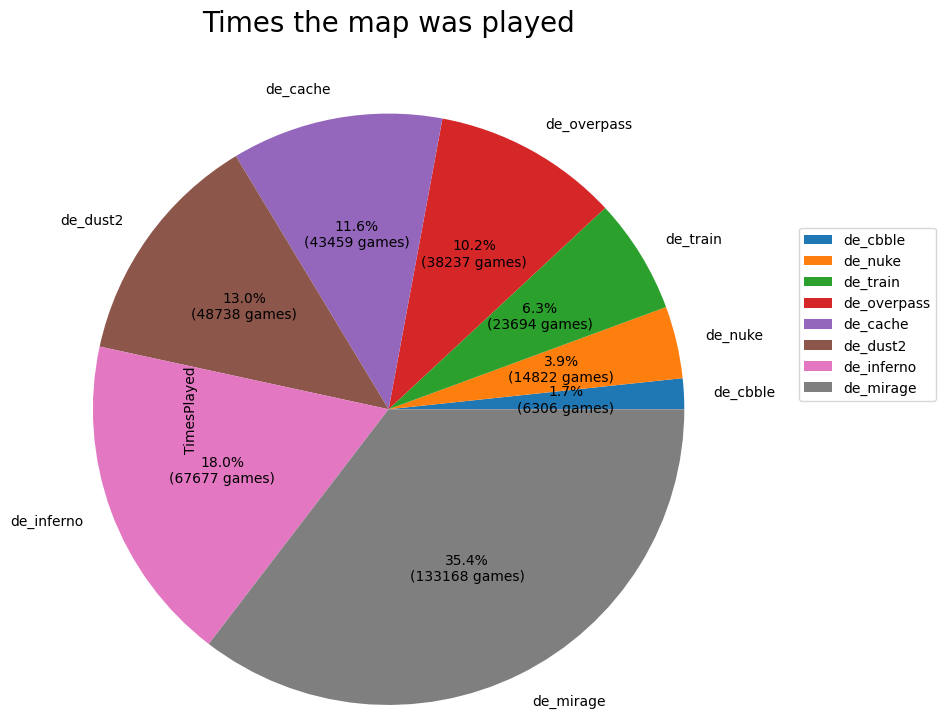

In [ ]:
ax = Maps.plot.pie(y = "TimesPlayed", title = "Timees the Map was played", autopct=lambda pct: func(pct, Maps.loc[:,"TimesPlayed"]), radius = 2)
plt.legend(bbox_to_anchor=(2, 1.01))
ax.set_title("Times the map was played", y=1.5, fontdict={"size": 20})


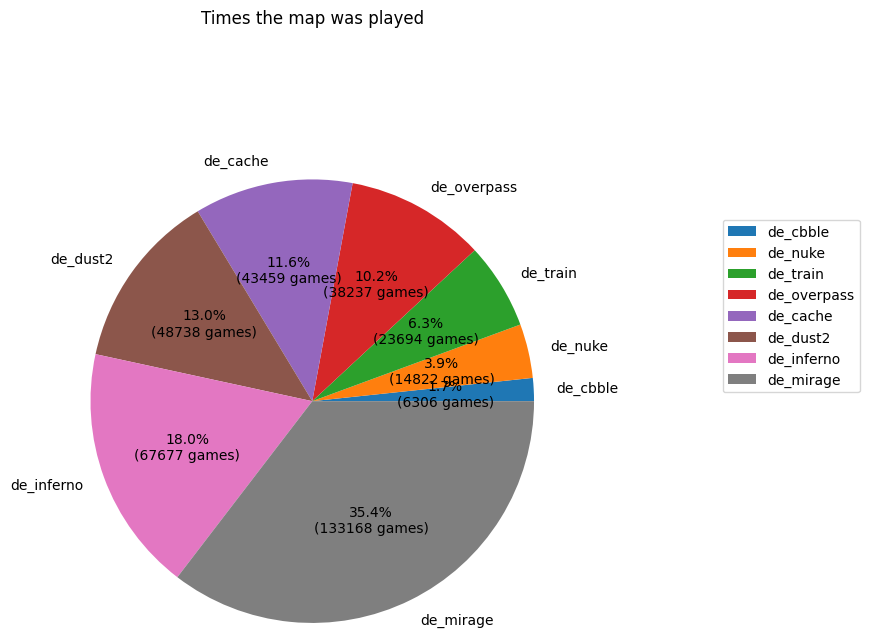

In [ ]:
fig, ax = plt.subplots()
# data = Maps.query("TimesPlayed > 10")["TimesPlayed"]
data = Maps.loc[:,"TimesPlayed"]
p, tx, autotexts = ax.pie(
    data, labels=data.index, autopct=lambda pct: func(pct, data), radius=1.5
)
ax.xaxis.set_label_position("top")
ax.set_title("Times the map was played", y=1.5)

plt.legend(bbox_to_anchor=(2, 1.01))
plt.show()


In [25]:
Maps

,Kills,Deaths,Mvps,TimesPlayed,Headshots%,Result
Map,,,,,,
de_cbble,95493,102488,13454,6306,37.552965,3374
de_nuke,279872,278096,39778,14823,41.327329,7420
de_train,432832,428884,61415,23694,39.858192,12064
de_overpass,710209,700060,100361,38238,39.109080,19320
de_cache,751567,760111,105645,43459,38.753745,21983
de_dust2,903687,892624,127118,48738,42.284911,24401
de_inferno,1248223,1234139,178832,67677,41.385005,33978
de_mirage,2487272,2409016,353318,133169,41.705765,68787


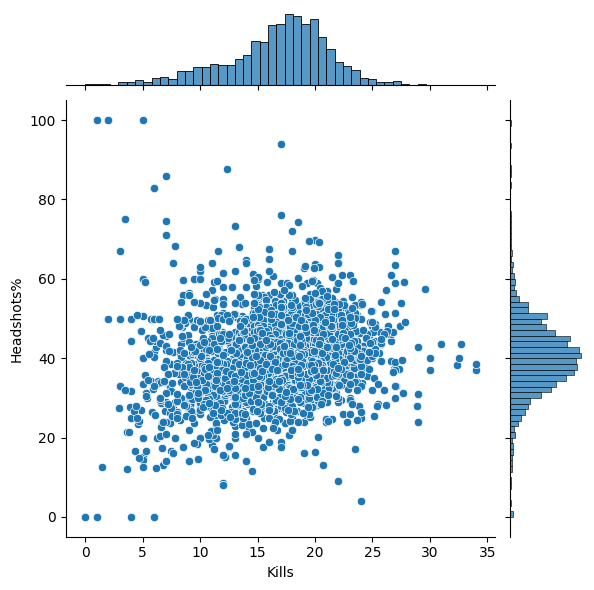

In [ ]:
sns.jointplot(data = DF_others_grouped, x = "Kills", y = "Headshots%", kind="scatter")